In [80]:
# Task 1 Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. Проверьте размер таблицы, типы переменных, наличие пропущенных значений, описательную статистику.

In [81]:
import pandas as pd

In [87]:
user=pd.read_csv("user_data.csv")
logs=pd.read_csv("logs.csv")

In [92]:
user.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [91]:
logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [88]:
user.shape

(2954, 3)

In [89]:
logs.shape

(4500, 4)

In [93]:
user.isna().sum()

client     0
premium    0
age        0
dtype: int64

In [94]:
logs.isna().sum()

client      0
success     0
platform    0
time        0
dtype: int64

In [95]:
user.dtypes

client     int64
premium     bool
age        int64
dtype: object

In [96]:
logs.dtypes

client       int64
success       bool
platform    object
time         int64
dtype: object

<AxesSubplot:>

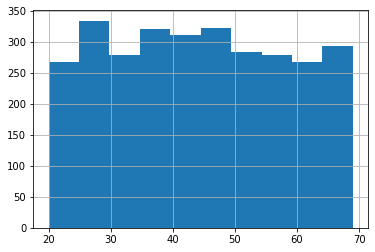

In [97]:
user.age.hist()

In [99]:
user.premium.value_counts()

False    2548
True      406
Name: premium, dtype: int64

In [104]:
logs.success.value_counts()

True     3289
False    1211
Name: success, dtype: int64

<AxesSubplot:>

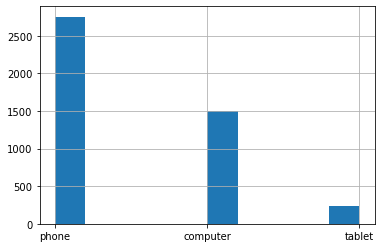

In [105]:
logs.platform.hist()

In [ ]:
# Task 2 Какой клиент совершил больше всего успешных операций? (success == True)

In [205]:
logs.groupby("client").agg({"success":"sum"}).sort_values(by="success",ascending=False).head(1)

,success
client,
82563,41


In [206]:
# Task 3 С какой платформы осуществляется наибольшее количество успешных операций?

In [207]:
slct=logs[logs["success"]==True]

<AxesSubplot:>

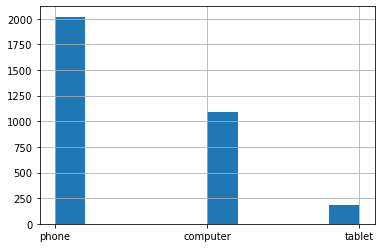

In [208]:
slct.platform.hist()

In [209]:
logs.groupby("platform").agg({"success":"sum"}).sort_values(by="success",ascending=False).head(1)

,success
platform,
phone,2019


In [210]:
# Task 4 Какую платформу предпочитают премиумные клиенты?

In [211]:
df=user.merge(logs, how="left")
df.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [212]:
df=df[df["premium"]==True]

<AxesSubplot:>

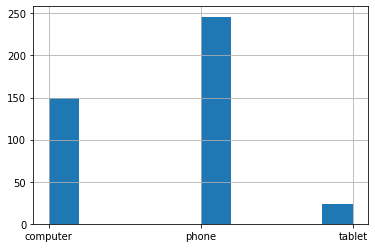

In [213]:
df.platform.hist()

In [215]:
df.groupby("platform").agg({"success":"sum"}).sort_values(by="success",ascending=False).head(1)

,success
platform,
phone,177


In [216]:
# Task 5 Визуализируйте распределение возраста клиентов в зависимости от типа клиента (премиум или нет)

<AxesSubplot:ylabel='Frequency'>

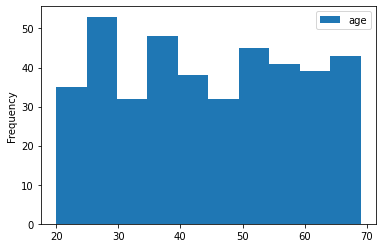

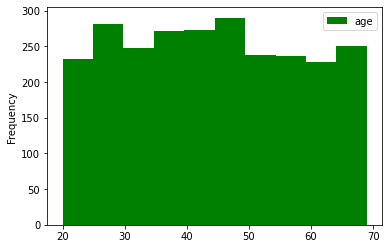

In [217]:
df1=user[user["premium"]==True]
df2=user[user["premium"]==False]
df1.plot(y="age", kind="hist")
df2.plot(y="age", kind="hist",color="g")

In [218]:
import seaborn as sns

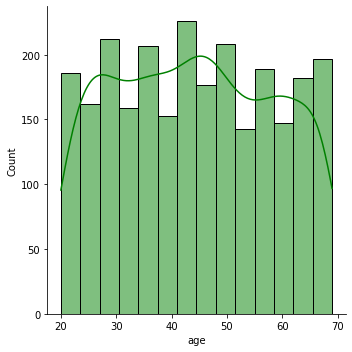

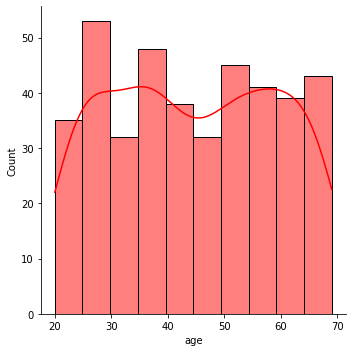

In [219]:
sns.displot(df2.age,kde=True, color="green")
sns.displot(df1.age,kde=True,color="red")


In [220]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age', ylabel='Count'>

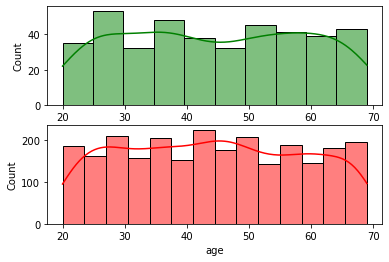

In [221]:
fig, ax = plt.subplots(nrows=2, ncols=1)

sns.histplot(df1.age,ax=ax[0],kde=True, color="green")
sns.histplot(df2.age, ax=ax[1],kde=True,color="r")


In [222]:
# Task 6 Постройте график распределения числа успешных операций

C:\Users\marks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\marks\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='success', ylabel='count'>

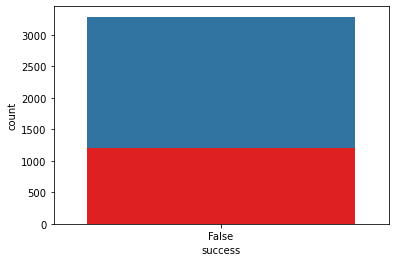

In [223]:
df3=logs[logs["success"]==True]
df4=logs[logs["success"]==False]



sns.countplot(df3.success)
sns.countplot(df4.success,color="red")

In [224]:
# Task 7 Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot (x – возраст, y – число успешных операций).

In [225]:
df5=df[df["platform"]=="computer"]

In [226]:
df5

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
30,32603,True,20,True,computer,1585473383
70,41722,True,52,True,computer,1585452816
79,47897,True,22,False,computer,1585474647
...,...,...,...,...,...,...
3336,49372,True,57,True,computer,1585465116
3338,84841,True,54,True,computer,1585410829
3396,70875,True,25,True,computer,1585415749
3412,76826,True,65,False,computer,1585416743


# Task 8 Клиенты какого возраста совершили наибольшее количество успешных действий?

In [199]:
df5.groupby("age",as_index=False).agg({"success":"sum"}).sort_values(by="success", ascending=False).head(1)

,age,success
36,59,7


<AxesSubplot:xlabel='age', ylabel='success'>

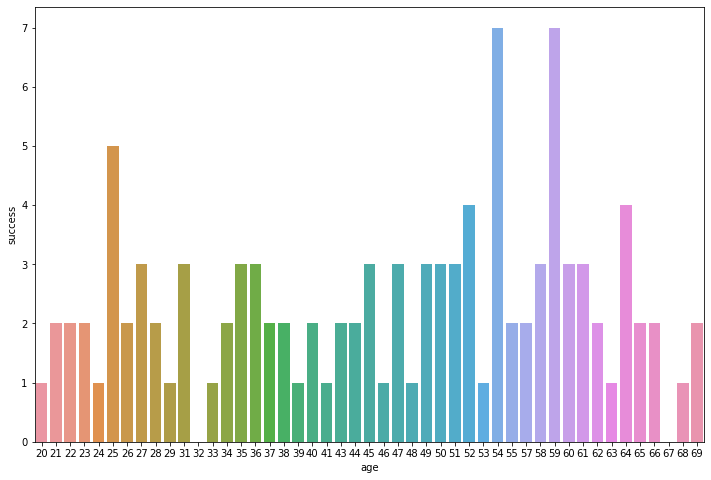

In [204]:
n_s=df5.groupby("age",as_index=False).agg({"success":"sum"})
plt.figure(figsize=(12,8))
sns.barplot(x=n_s.age, y=n_s.success, data=n_s)

<AxesSubplot:ylabel='count'>

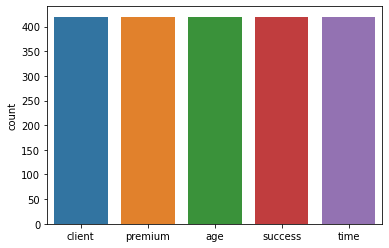

In [229]:
sns.countplot(data=df)